In [168]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [169]:
from tensorflow import keras

keras.__version__

'2.4.0'

In [170]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [171]:
X_train_full.shape

(60000, 28, 28)

In [172]:
X_train_full.dtype

dtype('uint8')

In [173]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0

In [174]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [175]:
class_names[y_train[0]]

'Coat'

In [176]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [177]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [178]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_99 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_100 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.layers

In [180]:
hidden1 = model.layers[1]
hidden1.name

'dense_98'

In [181]:
# model.get_layer('dense_24') is hidden1

In [182]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0170768 ,  0.03206944, -0.00322118, ..., -0.02582468,
        -0.02418663, -0.02343342],
       [-0.04610464, -0.02710871,  0.0156138 , ...,  0.01045075,
         0.04035386, -0.05548761],
       [-0.00768241,  0.00396954, -0.00876842, ..., -0.04078498,
         0.04381339,  0.04084881],
       ...,
       [ 0.04273737, -0.06561106, -0.02715919, ..., -0.01011487,
        -0.07160607, -0.00558574],
       [ 0.06493786, -0.04863042,  0.04153522, ...,  0.00270836,
         0.04185176, -0.00301185],
       [-0.01614567, -0.01053724, -0.04599381, ...,  0.0083755 ,
         0.058879  ,  0.00551935]], dtype=float32)

In [183]:
weights.shape

(784, 300)

In [184]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [185]:
biases.shape

(300,)

In [186]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [187]:
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [188]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7068 - accuracy: 0.7701 - val_loss: 0.5102 - val_accuracy: 0.8274

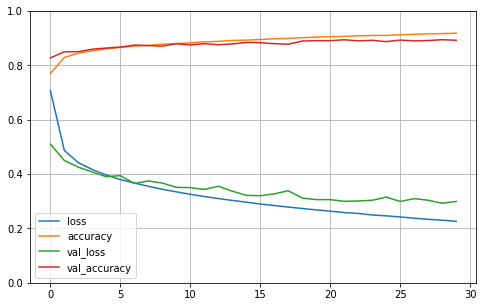

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [190]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 905us/step - loss: 0.3287 - accuracy: 0.8830


[0.3287135064601898, 0.8830000162124634]

In [191]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [192]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [193]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [194]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [195]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8732 - val_loss: 0.4721
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4632 - val_loss: 0.4083

In [197]:
from tensorflow.keras.layers import Input, Concatenate

input_ =  Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [198]:
model.summary()


Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_103 (Dense)               (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_104 (Dense)               (None, 30)           930         dense_103[0][0]                  
__________________________________________________________________________________________________
concatenate_9 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_104[0][0]      

In [199]:
from tensorflow.keras import Model

input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = Model(inputs=[input_A, input_B], outputs=[output])


In [200]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7416 - val_loss: 1.3318
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8066 - val_loss: 0.7306

In [201]:
y_pred = model.predict((X_new_A, X_new_B))


In [202]:
input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = Dense(1, name="main_output")(concat)
aux_output = Dense(1, name="aux_output")(hidden2)
model = Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [203]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [204]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9356 - main_output_loss: 0.8175 - aux_output_loss: 1.9986 - val_loss: 0.5720 - val_main_output_loss: 0.4878 - val_aux_output_loss: 1.3298

In [205]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 996us/step - loss: 0.3822 - main_output_loss: 0.3664 - aux_output_loss: 0.5240


In [206]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [207]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

subclassing_model = WideAndDeepModel()
subclassing_model.build([(None, 5), (None, 6)])
subclassing_model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
subclassing_model.summary()


Model: "wide_and_deep_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            multiple                  210       
_________________________________________________________________
dense_111 (Dense)            multiple                  930       
_________________________________________________________________
dense_112 (Dense)            multiple                  36        
_________________________________________________________________
dense_113 (Dense)            multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.save("my_keras_model.h5")


In [210]:
model_restored = keras.models.load_model("my_keras_model.h5")
model_restored.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_108 (Dense)               (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_109 (Dense)               (None, 30)           930         dense_108[0][0]                  
______________________________________________________________________________________

In [216]:
input_ =  Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.002))

In [218]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_from_checkpoint_best.h5", save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4547
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4341 - val_loss: 0.4049

In [222]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [223]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
print_val_train_ratio = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, print_val_train_ratio])

Epoch 1/1000
363/363 [==============================] - ETA: 0s - loss: 0.2894
val/train: 1.07
363/363 [==============================] - 1s 1ms/step - loss: 0.2894 - val_loss: 0.3083
Epoch 2/1000
325/363 [=========================>....] - ETA: 0s - loss: 0.2883

In [225]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.2796 - val_loss: 0.4300
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.2798 - val_loss: 0.3311

In [227]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)